# Problem z pakowaniem pojemników  z pomocą AG
(Bin packing problem)

<p align="center">
  <img width="660" height="300" src="https://scipbook.readthedocs.io/en/latest/_images/bpp-instance.png">
</p>

W przypadku problemu pakowania w pojemniki przedmioty o różnej objętości muszą być pakowane w liczbę pojemników, z których każdy ma określoną objętość w sposób minimalizujący liczbę używanych pojemników. 

W teorii złożoności obliczeniowej jest to kombinatoryczny problem <b>NP</b> - trudny.

<p align="center">
  <img width="660" height="300" src="https://scipbook.readthedocs.io/en/latest/_images/bpp-solution.png">
</p>

Spróbujmy rozwiązać ten problem za pomocą <b>Algorytmu Genetycznego</b>.

Jednak przed przystąpieniem do projektu postanowiłem uzupełnić braki wiedzy i kupiłem książkę: ["Genetic Algorithms with Python" by Clinton Sheppard](https://leanpub.com/genetic_algorithms_with_python)

(Jeśli ktoś jest zainteresowany, mogę wysłać książkę jako osobistą wiadomość w formacie .pdf)

# Sekwencja działań algorytmu

Najczęściej działanie algorytmu przebiega następująco:

* Losowana jest pewna populacja <i>początkowa</i>
* Selekcja
* Krzyżowanie
* Mutacja
* Rodzi się drugie (kolejne) pokolenie
* Jeśli znajdziemy wystarczająco dobre rozwiązanie, wybieramy najlepszego osobnika z populacji - jego genotyp to uzyskany <b>wynik</b>.

In [1]:
from collections import Counter # rodzaj słownika, który pozwala policzyć liczbę niezmiennych obiektów

import numpy as np
import matplotlib.pyplot as plot

# Populacja

W dowolnym momencie algorytm genetyczny przechowuje populację osobników - zbiór potencjalnych rozwiązań danego problemu.

In [2]:
n = 100 # liczba przedmiotów, które chcemy zmieścić w kontenerach

In [3]:
v = np.random.random(size = n) # objetości tych przedmiotów
np.round(v, 3)

array([0.795, 0.662, 0.667, 0.369, 0.638, 0.994, 0.456, 0.138, 0.117,
       0.141, 0.267, 0.784, 0.405, 0.341, 0.051, 0.306, 0.689, 0.314,
       0.899, 0.596, 0.485, 0.556, 0.517, 0.353, 0.566, 0.133, 0.866,
       0.091, 0.892, 0.307, 0.807, 0.326, 0.142, 0.562, 0.426, 0.605,
       0.49 , 0.185, 0.119, 0.02 , 0.258, 0.089, 0.934, 0.758, 0.624,
       0.541, 0.642, 0.266, 0.632, 0.591, 0.989, 0.963, 0.8  , 0.173,
       0.205, 0.38 , 0.554, 0.579, 0.824, 0.867, 0.563, 0.473, 0.465,
       0.812, 0.393, 0.337, 0.956, 0.536, 0.681, 0.572, 0.376, 0.252,
       0.102, 0.109, 0.023, 0.002, 0.842, 0.083, 0.273, 0.921, 0.374,
       0.442, 0.939, 0.555, 0.442, 0.992, 0.634, 0.623, 0.735, 0.122,
       0.407, 0.103, 0.923, 0.648, 0.169, 0.901, 0.136, 0.201, 0.772,
       0.097])

In [4]:
v_max = 3 # maksymalna objetość każdego kontenera

Stąd mamy obiekty o pewnej objętości $v_i$, $i=1,...,n$ i dowolną liczbę kontenerów, każdy o pojemności <i>v_max</i>.

<i>Jaka jest najmniejsza liczba kontenerów potrzebna, by spakować wszystkie obiekty?</i>

# Rozwiązania w populacji

Reprezentacja załadowania $nr$_$kontenera()$ :
* $[i_1,i_2,\dots,i_n]$,  gdzie $i_k$ oznacza № kontenera, w którym jest obiekt $k$.

In [5]:
def nr_kontenera(): # konfiguracja numerów kontenera
    return np.random.randint(n, size=n) # wybrany losowo

print(nr_kontenera())

[12 54 64 72 62 89 38 35  1 49 78 60 63 13 99 83 45 84 91 40  6 26 25 26
 25 27 41 72 20 13 67  5  1 20 18 61 66 76 43 83  1  3 33 32 24  6  7 64
  5 96 15  0 96 16 31 80 18 62 89 61 46 16 10 70 16 22 95 38 23 31 63 82
 36 99 61 13 48 59  8 91 23 48  1 87 94 46 78 59 62 10 91 47 38 78 12 81
 55 26 33 87]


#  Populacja początkowa 100 osobników 

In [6]:
population_size = 100

# każda osoba z populacji wybiera własną konfigurację numerów kontenerów 
population = np.array([nr_kontenera() for _ in range(population_size)])
population 

array([[22, 52, 16, ..., 27, 19, 69],
       [82, 70, 67, ..., 73, 67, 43],
       [88,  0, 27, ..., 27,  5, 46],
       ...,
       [ 5, 75, 78, ..., 50, 10,  4],
       [34, 42, 10, ..., 47, 40, 45],
       [96, 25, 90, ...,  6, 97, 35]])

In [7]:
population[0]

array([22, 52, 16,  2, 83, 56, 96, 50, 39, 56, 92, 18, 88, 66, 29, 73, 65,
       34, 49, 96, 12, 73,  8, 95, 32, 60, 62, 25, 67, 34, 95, 25, 36,  4,
       81, 79, 47, 75, 73, 27, 92, 66,  8, 48, 74, 61, 14, 87, 85, 95,  4,
        8, 54, 79,  5, 97, 29, 13, 20, 38, 62, 39,  4, 97, 70, 46, 89, 91,
       71, 31, 74, 53, 53, 42,  2, 26, 48, 90,  6, 95, 50, 78, 58, 82, 60,
       54, 11,  7, 81, 73, 15, 86, 51,  1, 14, 31, 79, 27, 19, 69])

Liczymy liczbę użytych kontenerów za pomozą funkcji <b>quantity()</b>

In [8]:
def quantity(nr_kontenera):                
    myDict = Counter(nr_kontenera) # Counter - rodzaj słownika, który pozwala policzyć liczbę niezmiennych obiektów
    return len(myDict) # liczba unikalnych elementów == liczba użytych kontenerów !!!

quantity(population[0]) # Pierwsza osoba z populacji wybrała X kontenery

67

Funkcja <b>sumy</b> po numerach kontenerów, np. [1,2,0,4,5] -> 1+2+0+4+5 

In [9]:
def suma(nr_kontenera):    
    return sum(nr_kontenera)

suma(population[0])

5104

Obliczamy zużytą objętość każdego pojemnika, która została wybrana przez każdą osobę z populacji za pomozą funkcji <b>volume()</b>

In [10]:
def volume(nr_kontenera):  
    ress_final = []    
    ress = []
    for j in range(n):
        nr_kont = nr_kontenera[j]
        summ = 0        
        for u in range(n):
            if nr_kont == nr_kontenera[u]: # jeśli przedmioty należą do jednego pojemnika, sumuje się ich objętość !!!
                summ += v[u]             
        ress.append(summ)
    new_ress = list(set(ress))
    ress_final.append(new_ress)
    return ress_final

Wykorzystana objętość pojemników przez pierwszą osobę:

In [11]:
alll = volume(population[0])
NEW_alll = alll[0]
NEW_alll # liczba elementów NEW_alll == liczba użytych kontenerów !!!

[0.7951340642379875,
 0.6624562777285264,
 0.39110148910867326,
 0.6381069654425561,
 0.6668103035885655,
 1.1358807583289492,
 1.0525684757197324,
 0.5122176636076132,
 0.5905430194009774,
 0.5247528243550083,
 1.1033158917393666,
 2.414620733465146,
 0.27306284946294934,
 0.7716377959116923,
 0.40450792440585404,
 0.48542754596458004,
 0.5664180451287015,
 0.5743286918339854,
 0.20482513022161997,
 0.8667238466250604,
 0.4899724982162418,
 0.5552237041670288,
 0.18490948971449273,
 0.10336930416566625,
 1.1609038260356432,
 1.7921329781910367,
 1.4730585965897345,
 0.8916051537182957,
 0.22043057499438723,
 0.6318741378230707,
 0.9557665736129325,
 0.6231464157783316,
 0.6481002966278192,
 0.8986398144417762,
 0.41698092367288875,
 0.14240466528717266,
 0.43000825671104514,
 0.26639388154436794,
 0.7840009711197,
 0.5790874812449553,
 0.8235737901161118,
 0.10855995903219107,
 1.4294298716122755,
 0.3933109549652648,
 0.09663109775002632,
 0.6890844895459367,
 0.5408498673365199,
 0.

Do tablicy <b>numerów</b> dodajemy <b>sumę</b> użytych kontenerów :

In [12]:
nr_count = [[nr_kontenera, suma(nr_kontenera)] for nr_kontenera in population]
#nr_count

In [13]:
nr_count[0]

[array([22, 52, 16,  2, 83, 56, 96, 50, 39, 56, 92, 18, 88, 66, 29, 73, 65,
        34, 49, 96, 12, 73,  8, 95, 32, 60, 62, 25, 67, 34, 95, 25, 36,  4,
        81, 79, 47, 75, 73, 27, 92, 66,  8, 48, 74, 61, 14, 87, 85, 95,  4,
         8, 54, 79,  5, 97, 29, 13, 20, 38, 62, 39,  4, 97, 70, 46, 89, 91,
        71, 31, 74, 53, 53, 42,  2, 26, 48, 90,  6, 95, 50, 78, 58, 82, 60,
        54, 11,  7, 81, 73, 15, 86, 51,  1, 14, 31, 79, 27, 19, 69]),
 5104]

Sortowanie według liczby zużytych pojemników (rosnąco):

In [14]:
sort = sorted(nr_count, key=lambda x: x[1]) 
sort[0]

#można uruchomić i zobaczyć, jaki jest wynik

[array([ 5, 75, 78, 62, 21, 15, 88,  0, 21, 53,  6,  4, 63, 13, 62, 30,  8,
        30, 69,  2, 10, 83, 41, 72, 31, 22,  2, 69, 89, 21, 72, 44, 83, 15,
        59, 10,  9, 49, 45, 67, 67,  4, 39, 80, 30, 27, 96, 74, 39,  8, 23,
        41, 53,  5, 12, 63, 61, 94, 44, 88, 46, 67, 63,  9, 30, 21, 50, 29,
        21, 28, 33,  2, 81, 43,  4, 24, 12, 11, 18, 81, 82, 65, 89,  9,  5,
        98, 86, 73, 40, 39, 19, 18, 70,  7, 24, 41, 95, 50, 10,  4]),
 4143]

# Selekcja

Po obliczeniu sprawności wszystkich osobników w populacji rozpoczyna się proces <b>selekcji</b>, który określa, które osobniki zostaną pozostawione do <b>reprodukcji</b>, czyli stworzenie potomstwa, które będzie stanowić następne pokolenie.

In [15]:
def selection(popu, n_best):    
      
    sel_summ = [[]]    
    t = 0        
    
    com = [[nr_kontenera, suma(nr_kontenera)] for nr_kontenera in popu]
    popu_c = sorted(com, key=lambda x: x[1])
    sort_summ = [x[0] for x in popu_c]   
    
    for j in range(len(sort_summ)):
        # Pozostawiamy tylko te kombinacje, które spełniają warunek:
        # Objętość pojemników nie przekracza dopuszczalnej wartości
        wynik = all(item <= v_max for item in volume(sort_summ[j])[0])
        if wynik == True:          
            sel_summ = np.append(sel_summ, sort_summ[j])              
            t += 1
            if t == n_best:
                break

    sel_summ=np.reshape(sel_summ,[t,n])
        
    return sel_summ 

Testowanie funkcji <b>selection()</b>. Sprawdzenie, że funkcja działa poprawnie:

In [16]:
# test
population2=selection(population, 3) # wybranie 3 najlepszych
print(population2)

[[ 5. 75. 78. 62. 21. 15. 88.  0. 21. 53.  6.  4. 63. 13. 62. 30.  8. 30.
  69.  2. 10. 83. 41. 72. 31. 22.  2. 69. 89. 21. 72. 44. 83. 15. 59. 10.
   9. 49. 45. 67. 67.  4. 39. 80. 30. 27. 96. 74. 39.  8. 23. 41. 53.  5.
  12. 63. 61. 94. 44. 88. 46. 67. 63.  9. 30. 21. 50. 29. 21. 28. 33.  2.
  81. 43.  4. 24. 12. 11. 18. 81. 82. 65. 89.  9.  5. 98. 86. 73. 40. 39.
  19. 18. 70.  7. 24. 41. 95. 50. 10.  4.]
 [66. 42. 54. 44.  5. 21.  1. 73. 16. 81. 75. 58.  1. 65. 71. 25. 67. 62.
  49. 12. 11. 31. 87.  0. 33. 75. 64. 53. 76.  5. 70. 28. 22. 19. 91. 10.
  15.  8. 26. 65. 39. 24. 54. 51. 22. 19. 19. 99. 61. 60. 26. 13. 17. 42.
  54. 40. 77.  3. 38. 41. 45. 44. 66. 88. 27. 25.  0. 50. 70. 31. 35. 11.
  55. 31. 15. 36. 64. 35. 64. 31. 52. 96. 79. 19. 44. 56. 64. 67. 53.  6.
  14. 91. 68. 68. 69. 10. 24. 31. 52. 25.]
 [37.  9. 73.  9. 70. 90. 41. 23. 41. 75. 66. 40. 14. 86. 86.  4. 20. 33.
  75. 32. 48. 45. 81. 54. 98. 38. 20. 14. 60. 36. 30.  7. 58.  2. 39. 79.
  61. 90.  5. 30.  8. 30. 

# Mutacja

Celem operatora mutacji jest okresowa, losowa aktualizacja populacji, to znaczy wprowadzenie nowych kombinacji genów do chromosomów, stymulując tym samym poszukiwania w niezbadanych obszarach przestrzeni rozwiązań.

In [17]:
def mutation(nr_kontenera, probability): # nr_kontenera - osobnik, p - prawdopodobieństwo zajścia mutacji 
    if np.random.random() < probability:
        ind1=np.random.randint(n) 
        ind2=np.random.randint(n) 
        nr_kontenera[ind1]=nr_kontenera[ind2] 
        
    return nr_kontenera

In [18]:
print(population2[0])

[ 5. 75. 78. 62. 21. 15. 88.  0. 21. 53.  6.  4. 63. 13. 62. 30.  8. 30.
 69.  2. 10. 83. 41. 72. 31. 22.  2. 69. 89. 21. 72. 44. 83. 15. 59. 10.
  9. 49. 45. 67. 67.  4. 39. 80. 30. 27. 96. 74. 39.  8. 23. 41. 53.  5.
 12. 63. 61. 94. 44. 88. 46. 67. 63.  9. 30. 21. 50. 29. 21. 28. 33.  2.
 81. 43.  4. 24. 12. 11. 18. 81. 82. 65. 89.  9.  5. 98. 86. 73. 40. 39.
 19. 18. 70.  7. 24. 41. 95. 50. 10.  4.]


Wynik uzyskany po <i>mutacji</i> losowej :

In [19]:
print(mutation(population2[0], 0.8)) # prawdopodobieństwo mutacji = 0.8

[ 5. 75. 78. 62. 21. 15. 88.  0. 21. 53.  6.  4. 63. 13. 62. 30.  8. 30.
 69.  2. 10. 83. 41. 72. 31. 22.  2. 69. 89. 21. 72. 44. 83. 15. 59. 10.
  9. 49. 45. 67. 67.  4. 39. 80. 30. 27. 96. 74. 39.  8. 23. 41. 53.  5.
 12. 63. 61. 94. 44. 88. 46. 67. 63.  9. 30. 21. 50. 29. 21. 28. 33.  2.
 81. 43.  4. 24. 12. 11. 18. 81. 82. 65. 89.  9.  5.  6. 86. 73. 40. 39.
 19. 18. 70.  7. 24. 41. 95. 50. 10.  4.]


# Krzyżowanie

Aby stworzyć parę nowych osobników, zazwyczaj wybiera się rodziców z obecnego pokolenia, a części ich chromosomów są zamieniane (krzyżowane), w wyniku czego powstają dwa nowe chromosomy reprezentujące potomstwo.

In [20]:
def crossover(father, mother): # dwoje rodziców
    cut=np.random.randint(n) # losowe miejsce przecięcia chromosomu 
    chm=np.delete(mother, np.arange(0,cut, 1))
    chp=np.delete(father, np.arange(cut, n, 1))    
    child=np.concatenate((chp,chm),axis=0) # dziecko
    mutation(child, 0.8) # losowa mutacja
    
    return child # dziecko (potomstwo)

## Czas stworzyć dynastię

In [21]:
n_children = 3*population_size # liczebność dzieci

In [22]:
def generation(population_def, population_size_def):      
    children=np.array([crossover(population_def[np.random.randint(len(population_def))],\
                             population_def[np.random.randint(len(population_def))]) for _ in range(n_children)])
                               
    family = np.concatenate((population_def, children), axis = 0) # dodanie dzieci do populacji rodziców        
    population = selection(family, population_size_def)

    return population

Narodziny kolejnych 200 pokoleń, których rozwiązania są unikalne.
Wybieramy tylko to, co najlepsze w każdym pokoleniu.

In [23]:
for _ in range(200):
    population = generation(population, population_size)    
    quan = quantity(population[0]) # Minimalna liczba używanych kontenerów   
    
    print(quan, end=' ')

58 58 64 63 60 58 58 57 57 56 61 52 55 56 52 57 45 45 49 46 45 44 43 45 41 42 39 41 40 39 39 39 35 34 33 34 32 31 33 34 32 29 29 30 30 30 30 30 27 28 30 28 28 28 28 28 28 28 27 27 27 27 26 25 25 25 25 25 25 25 25 25 24 24 24 25 25 25 24 24 23 23 23 23 23 24 24 23 22 24 24 22 22 22 22 22 22 22 22 22 22 22 22 22 21 21 21 20 20 21 21 21 20 21 21 21 20 20 20 20 20 20 20 20 20 20 20 20 20 20 19 19 19 19 19 19 19 19 19 19 19 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 

### Uczyńmy nazwy zmiennych w bardziej reprezentatywnej formie

In [24]:
final_volume = [volume(population[0]) for _ in volume(population[0])]
quant = quantity(population[0]) # Minimalna liczba używanych kontenerów

final_volume2 = [] 
for i in range(quant):
    final_volume2.append(final_volume[0][0][i]) # Używana objętość każdego pojemnika    

In [25]:
print('\nMinimalna liczba używanych kontenerów: ', quant)


Minimalna liczba używanych kontenerów:  17


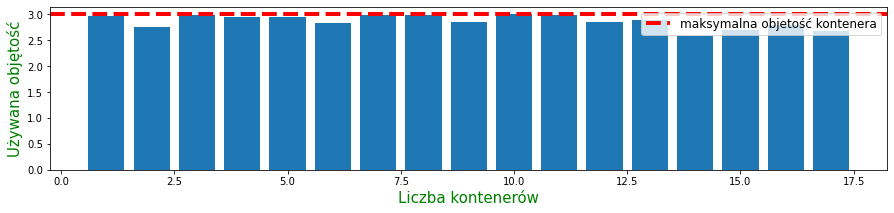

In [26]:
plot.figure(figsize=(15, 3))
x = np.arange(quant) # Liczba używanych kontenerów
plot.bar(x+1, height = final_volume2)

# rysowanie linii poziomej == maksymalna objetość każdego kontenera
plot.axhline(y = v_max, color = 'r', linewidth=4, linestyle = '--', label='maksymalna objetość kontenera')  

plot.xlabel('Liczba kontenerów', fontsize=15, color='green')
plot.ylabel('Używana objętość', fontsize=15, color='green')

#plt.grid()
plot.legend(fontsize=12)
plot.show()

# Wniosek

Korzystając z Algorytmu Genetycznego, staraliśmy znaleźć minimalną liczbę pojemników wymaganych do spakowania wszystkich przedmiotów. Istnieje jednak duże prawdopodobieństwo, że to rozwiązanie nie jest najbardziej optymalne (jak widać na wykresie, <i>nie wszystkie</i> słupki osiągają maksimum.). Ale w przypadku problemów ze złożonością kombinatoryczną NP, takie podejście jest całkiem uzasadnione.

# Źródła inspiracji:

* <b>Materiał</b> z Wykładu cz. II i IV (Algorytmy ewolucyjne)
* <b>Genetic Algorithms with Python</b> by Clinton Sheppard
* <b>Hands-On Genetic Algorithms with Python</b> by Eyal Wirsansky